In [ ]:
# TensorFlow와 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 기본 데이터셋 로드 (Fashion MNIST)
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

# 클래스명 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# 흑백(28x28) → RGB(96x96x3)으로 변환하는 함수 정의
def preprocess_images(images):
    images = tf.expand_dims(images, -1)  # (28,28) → (28,28,1)
    images = tf.image.resize(images, [96, 96])  # 이미지 크기 조정
    images = tf.image.grayscale_to_rgb(images)  # RGB 채널로 변환
    return images/127.5 - 1.0

train_images_rgb = preprocess_images(train_images)
test_images_rgb = preprocess_images(test_images)

print(train_images_rgb.shape)  # (60000, 96, 96, 3)

(5000, 96, 96, 3)


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(96,96,3),
                                               include_top=False,
                                               weights='imagenet')

# base_model의 학습 여부 설정
base_model.trainable = False  # 초기에는 Freeze 상태로 유지

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
len(base_model.layers)

154

In [ ]:
# Transfer Learning을 위한 모델 구성
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96 (Functional)     │ (None, 3, 3, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images_rgb, train_labels,
                    epochs=10,
                    validation_data=(test_images_rgb, test_labels))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 304ms/step - accuracy: 0.6680 - loss: 0.9902 - val_accuracy: 0.8460 - val_loss: 0.4361
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 255ms/step - accuracy: 0.8717 - loss: 0.3603 - val_accuracy: 0.8550 - val_loss: 0.4191
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 261ms/step - accuracy: 0.8896 - loss: 0.2891 - val_accuracy: 0.8820 - val_loss: 0.3586
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 217ms/step - accuracy: 0.9215 - loss: 0.2248 - val_accuracy: 0.8660 - val_loss: 0.3849
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 255ms/step - accuracy: 0.9231 - loss: 0.1956 - val_accuracy: 0.8710 - val_loss: 0.3679
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 221ms/step - accuracy: 0.9382 - loss: 0.1699 - val_accuracy: 0.8760 - val_loss: 0.3682
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 247ms/step - accuracy: 0.9524 - loss: 0.1415 - val_accuracy: 0.8780 - val_loss: 0.3674
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 244ms/step - accuracy: 0.9586 - loss: 0

In [ ]:
loss, accuracy = model.evaluate(test_images_rgb, test_labels)
print(f'Test Accuracy: {accuracy:.4f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.8634 - loss: 0.4360
Test Accuracy: 0.8740


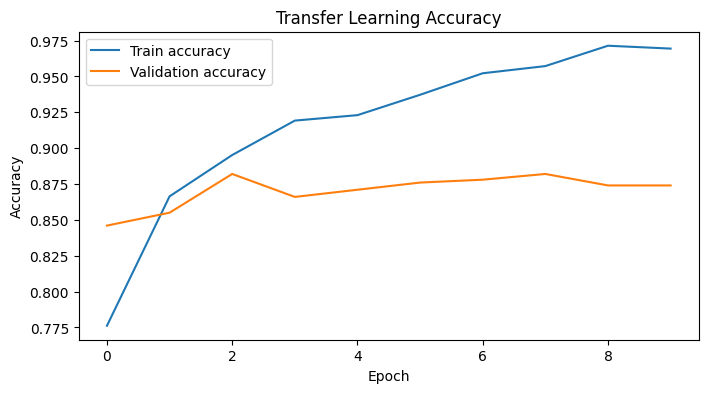

In [ ]:
# 정확도 변화 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Transfer Learning Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# EarlyStopping 설정: 3 epoch 동안 성능 개선 없으면 중단
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ModelCheckpoint 설정: 최적의 모델 저장
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)

In [ ]:
history = model.fit(
    train_rgb, train_labels,
    epochs=20,
    validation_split=0.1,
    callbacks=[early_stop, checkpoint]
)

In [ ]:
# 최적의 모델 다시 로드하기
best_model = tf.keras.models.load_model('best_model.keras')

# 로드한 모델 평가
loss, acc = best_model.evaluate(test_rgb, test_labels)
print(f"Best model accuracy: {acc:.4f}")